In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

First of all, we will transfer the necessary functions to implement the logic of the neural network.

sigmoid([0, 2, 10, -10]) = [0.5        0.88079708 0.11920292 0.9999546 ]


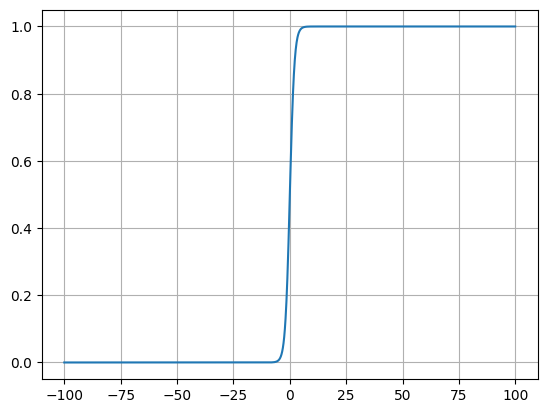

In [ ]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    z = np.clip(z, -500, 500)
    s = 1. / (1. + np.exp(-z))

    return s

print ("sigmoid([0, 2, 10, -10]) = " + str(sigmoid(np.array([0., 2., -2., 10.]))))
x = np.arange(-100, 100, 0.1)
plt.plot(x, sigmoid(x))
plt.grid()
plt.show()

In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.ones((dim,1))
    b = 0.

    return w, b

dim = 3
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[1.]
 [1.]
 [1.]]
b = 0.0


In [ ]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    m = X.shape[1]

    z = np.dot(w.T, X) + b
    A = sigmoid(z)

    epsilon = 1e-15
    A = np.clip(A, epsilon, 1. - epsilon)
    cost = -(1./m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=1)

    dw = (1./m) * np.dot(X, (A - Y).T)
    db = (1./m) * np.sum(A - Y, axis=1)

    grads = {"dw": dw, "db": db}

    return grads, cost

w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.0027004 ]
 [0.02446984]]
db = [0.00151471]
cost = [0.00295537]


w = [[ 1.23669609]
 [-2.12753139]]
b = [4.30332348]
dw = [[-2.93039813e-05]
 [ 5.53803309e-05]]
db = [-2.6405963e-05]


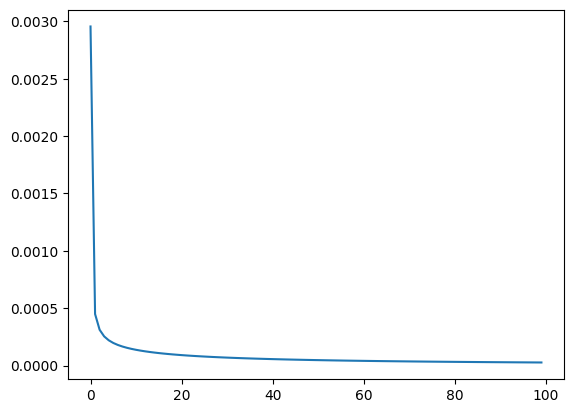

In [ ]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost[0])

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print (f"Cost after iteration {i}: {round(cost[0], 7)}")

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 10000, learning_rate = 0.5, print_cost = 0)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
plt.plot(costs)


In [ ]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T,X)+b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

w = np.array([[0.9124579],[-0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 0. 0.]]


In [ ]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Вычисление точности
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    print(f"Train accuracy: {train_accuracy:.2f}%")
    print(f"Test accuracy: {test_accuracy:.2f}%")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

Now let's start working with the data and evaluating the quality of the models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy

In [ ]:
# Loading data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/My Drive/bioresponse.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('Activity', axis=1).values
y = df['Activity'].values
# Splitting the dataset into 75% train and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"The size of the train sample: {X_train.shape}")
print(f"The size of the test sample: {X_test.shape}")

The size of the train sample: (2813, 1776)
The size of the test sample: (938, 1776)


In [ ]:
# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Transpose the data for the model
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

1. Using the model with gradient descent to predict the biological response of a molecule

In [ ]:
print("Training model with gradient descent (GD)")
d_gd = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.01, print_cost=True)

Training model with gradient descent (GD)
Cost after iteration 0: 16.8562477
Cost after iteration 100: 16.6966042
Cost after iteration 200: 16.3631177
Cost after iteration 300: 15.7993022
Cost after iteration 400: 15.0850284
Cost after iteration 500: 14.3892484
Cost after iteration 600: 13.2101833
Cost after iteration 700: 11.7758066
Cost after iteration 800: 10.3156551
Cost after iteration 900: 8.9029334
Cost after iteration 1000: 7.6429464
Cost after iteration 1100: 6.4512334
Cost after iteration 1200: 5.6060165
Cost after iteration 1300: 4.9943876
Cost after iteration 1400: 4.548931
Cost after iteration 1500: 4.1899765
Cost after iteration 1600: 3.8830524
Cost after iteration 1700: 3.6089621
Cost after iteration 1800: 3.3763982
Cost after iteration 1900: 3.1823961
Train accuracy: 74.69%
Test accuracy: 69.72%


Conclusions (GD):

* The initial convergence rate of 0.001 was too low and the model was no better than random guessing. With an increase in the value of this parameter, the quality of the model has improved significantly.
* Exponential decrease in convergence
* Retraining gap 5%

2.	Modifying the optimization function to implement the stochastic gradient descent method. Also adding the model with this method

In [ ]:
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost=False, batch_size=32):

    costs = []
    m = X.shape[1]

    for i in range(num_iterations):
        # Shuffling the data in each epoch to prevent dependence on the order of the data
        permutation = np.random.permutation(m)
        X_shuffled = X[:, permutation]
        Y_shuffled = Y[:, permutation]

        # Processing batches
        for j in range(0, m, batch_size):
            end = min(j + batch_size, m)
            X_batch = X_shuffled[:, j:end]
            Y_batch = Y_shuffled[:, j:end]

            # Calculating gradients for the batch
            grads, cost = propagate(w, b, X_batch, Y_batch)

            # Updating the parameters
            w -= learning_rate * grads["dw"]
            b -= learning_rate * grads["db"]

        if i % 100 == 0:
            grads, total_cost = propagate(w, b, X, Y)
            costs.append(total_cost[0])

            if print_cost and i % 100 == 0:
                print(f"Cost after iteration {i}: {total_cost[0]:.7f}")

    params = {"w": w, "b": b}
    grads = {"dw": grads["dw"], "db": grads["db"]}

    return params, grads, costs

In [ ]:
def model_sgd(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False, batch_size=32):

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    # Stochastic gradient descent
    parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train,  num_iterations, learning_rate, print_cost, batch_size)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Calculating train/test accuracy
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    print(f"Train accuracy (SGD): {train_accuracy:.2f}%")
    print(f"Test accuracy (SGD): {test_accuracy:.2f}%")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

Using the model with stochastic gradient descent to predict the biological response of a molecule

In [ ]:
print("Training stochastic gradient descent (SGD)")
d_sgd = model_sgd(X_train, y_train, X_test, y_test,num_iterations=2000, learning_rate=0.001, print_cost=True, batch_size=64)

Training stochastic gradient descent (SGD)
Cost after iteration 0: 16.8497125
Cost after iteration 100: 14.7683345
Cost after iteration 200: 9.1244656
Cost after iteration 300: 4.8738552
Cost after iteration 400: 3.4537139
Cost after iteration 500: 2.7020914
Cost after iteration 600: 2.1964723
Cost after iteration 700: 1.8444812
Cost after iteration 800: 1.5524976
Cost after iteration 900: 1.3258383
Cost after iteration 1000: 1.1519560
Cost after iteration 1100: 1.0079467
Cost after iteration 1200: 0.8945721
Cost after iteration 1300: 0.8066327
Cost after iteration 1400: 0.7352841
Cost after iteration 1500: 0.6756661
Cost after iteration 1600: 0.6251974
Cost after iteration 1700: 0.5817173
Cost after iteration 1800: 0.5438873
Cost after iteration 1900: 0.5107952
Train accuracy (SGD): 86.85%
Test accuracy (SGD): 71.22%


Conclusions (SGD):
* Exponential decrease in convergence
* High model quality, but noticeable overfitting. It makes sense to add regularization
* Converges much faster than the usual gradient descent

3. Modifying the optimization function to implement the Adam method. Also adding the model with this method

In [ ]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, beta1=0.9, beta2=0.999, epsilon=1e-8):

    costs = []
    m = X.shape[1]

    # Initializing moments
    v_dw = np.zeros_like(w)
    v_db = 0
    s_dw = np.zeros_like(w)
    s_db = 0

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        # Updating first-order moments
        v_dw = beta1 * v_dw + (1 - beta1) * dw
        v_db = beta1 * v_db + (1 - beta1) * db

        # Updating of second-order moments
        s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
        s_db = beta2 * s_db + (1 - beta2) * (db ** 2)

        # Correcting the offset
        v_dw_corrected = v_dw / (1 - beta1 ** (i + 1))
        v_db_corrected = v_db / (1 - beta1 ** (i + 1))
        s_dw_corrected = s_dw / (1 - beta2 ** (i + 1))
        s_db_corrected = s_db / (1 - beta2 ** (i + 1))

        # Updating parameters
        w -= learning_rate * v_dw_corrected / (np.sqrt(s_dw_corrected) + epsilon)
        b -= learning_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)

        if i % 100 == 0:
            costs.append(cost[0])

        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost[0]:.7f}")

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [ ]:
def model_adam(X_train, Y_train, X_test, Y_test, num_iterations=2000,  learning_rate=0.001, print_cost=0):

    # initialize parameters with zero
    w, b = initialize_with_zeros(X_train.shape[0])

    # Adam optimization
    parameters, grads, costs = optimize_adam(w, b, X_train, Y_train,  num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Calculating train/test accuracy
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100

    print(f"Train accuracy (Adam): {train_accuracy:.2f}%")
    print(f"Test accuracy (Adam): {test_accuracy:.2f}%")

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

Using the model with Adam optimization to predict the biological response of a molecule

In [ ]:
print("Training Adam optimization (Adam)")
d_adam = model_adam(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.001, print_cost=True)

Training Adam optimization (Adam)
Cost after iteration 0: 16.8562477
Cost after iteration 100: 16.7466904
Cost after iteration 200: 16.5980947
Cost after iteration 300: 16.3932153
Cost after iteration 400: 16.0926564
Cost after iteration 500: 15.5860655
Cost after iteration 600: 14.7323334
Cost after iteration 700: 13.2279065
Cost after iteration 800: 10.6852715
Cost after iteration 900: 7.6179131
Cost after iteration 1000: 4.7732818
Cost after iteration 1100: 3.4365721
Cost after iteration 1200: 2.8463407
Cost after iteration 1300: 2.4611211
Cost after iteration 1400: 2.1733744
Cost after iteration 1500: 1.9449777
Cost after iteration 1600: 1.7533008
Cost after iteration 1700: 1.5886442
Cost after iteration 1800: 1.4463583
Cost after iteration 1900: 1.3207612
Train accuracy (Adam): 79.24%
Test accuracy (Adam): 72.28%


Conclusions (Adam):
* Unlike previous methods, the convergence rate increases only towards the end
of the highest accuracy index among the methods, while minimizing the gap between the test and training data.
* The method is the most stable: less noise than SGD and more flexibility than GD

4. Comparison of learning curves for three learning methods

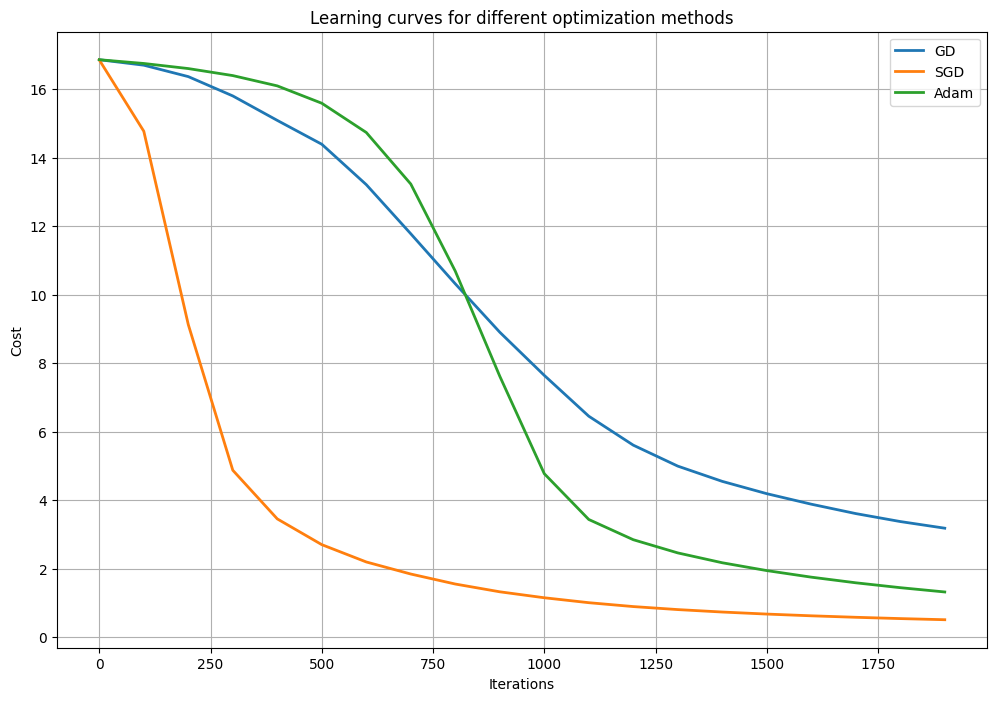

Comparative table of methods
  Method  Train Accuracy  Test Accuracy
0     GD       74.688944      69.722814
1    SGD       86.846783      71.215352
2   Adam       79.239246      72.281450


In [ ]:
plt.figure(figsize=(12, 8))
iterations = range(0, 2000, 100)

plt.plot(iterations, d_gd['costs'], label='GD', linewidth=2)
plt.plot(iterations, d_sgd['costs'], label='SGD', linewidth=2)
plt.plot(iterations, d_adam['costs'], label='Adam', linewidth=2)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning curves for different optimization methods')
plt.legend()
plt.grid(True)
plt.show()

methods = ['GD', 'SGD', 'Adam']
train_accuracies = [
    100 - np.mean(np.abs(d_gd['Y_prediction_train'] - y_train)) * 100,
    100 - np.mean(np.abs(d_sgd['Y_prediction_train'] - y_train)) * 100,
    100 - np.mean(np.abs(d_adam['Y_prediction_train'] - y_train)) * 100
]
test_accuracies = [
    100 - np.mean(np.abs(d_gd['Y_prediction_test'] - y_test)) * 100,
    100 - np.mean(np.abs(d_sgd['Y_prediction_test'] - y_test)) * 100,
    100 - np.mean(np.abs(d_adam['Y_prediction_test'] - y_test)) * 100
]

results_df = pd.DataFrame({
    'Method': methods,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

print("Comparative table of methods")
print(results_df)

* The graph shows that the highest convergence rate is at SGD
* Adam's learning curve is similar to S-shaped curve, more accurate values can be achieved with an increase in the number of iterations
* GD has the lowest convergence rate, even taking into account the higher learning rate

5. Train the models with different values of the learning rate

In [ ]:
learning_rates = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.5, 1.0]
models_gd = []
models_sgd = []
models_adam = []

for lr in learning_rates:
    print(f"\nLearning Rate: {lr} ")

    print("GD")
    model_gd_result = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
    models_gd.append(model_gd_result)

    print("SGD")
    model_sgd_result = model_sgd(X_train, y_train, X_test, y_test,num_iterations=2000, learning_rate=lr, print_cost=False, batch_size=64)
    models_sgd.append(model_sgd_result)

    print("Adam")
    model_adam_result = model_adam(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
    models_adam.append(model_adam_result)


Learning Rate: 0.0001 
GD
Train accuracy: 50.16%
Test accuracy: 51.28%
SGD
Train accuracy (SGD): 61.61%
Test accuracy (SGD): 60.02%
Adam
Train accuracy (Adam): 50.27%
Test accuracy (Adam): 51.49%

Learning Rate: 0.001 
GD
Train accuracy: 49.91%
Test accuracy: 50.53%
SGD
Train accuracy (SGD): 86.81%
Test accuracy (SGD): 71.22%
Adam
Train accuracy (Adam): 79.24%
Test accuracy (Adam): 72.28%

Learning Rate: 0.005 
GD
Train accuracy: 64.17%
Test accuracy: 62.47%
SGD
Train accuracy (SGD): 94.77%
Test accuracy (SGD): 73.45%
Adam
Train accuracy (Adam): 94.31%
Test accuracy (Adam): 73.24%

Learning Rate: 0.01 
GD
Train accuracy: 74.69%
Test accuracy: 69.72%
SGD
Train accuracy (SGD): 96.41%
Test accuracy (SGD): 72.49%
Adam
Train accuracy (Adam): 96.45%
Test accuracy (Adam): 73.77%

Learning Rate: 0.1 
GD
Train accuracy: 92.29%
Test accuracy: 71.64%
SGD
Train accuracy (SGD): 98.86%
Test accuracy (SGD): 71.00%
Adam
Train accuracy (Adam): 99.29%
Test accuracy (Adam): 71.22%

Learning Rate: 0.5 
G

Creating learning curves for each case

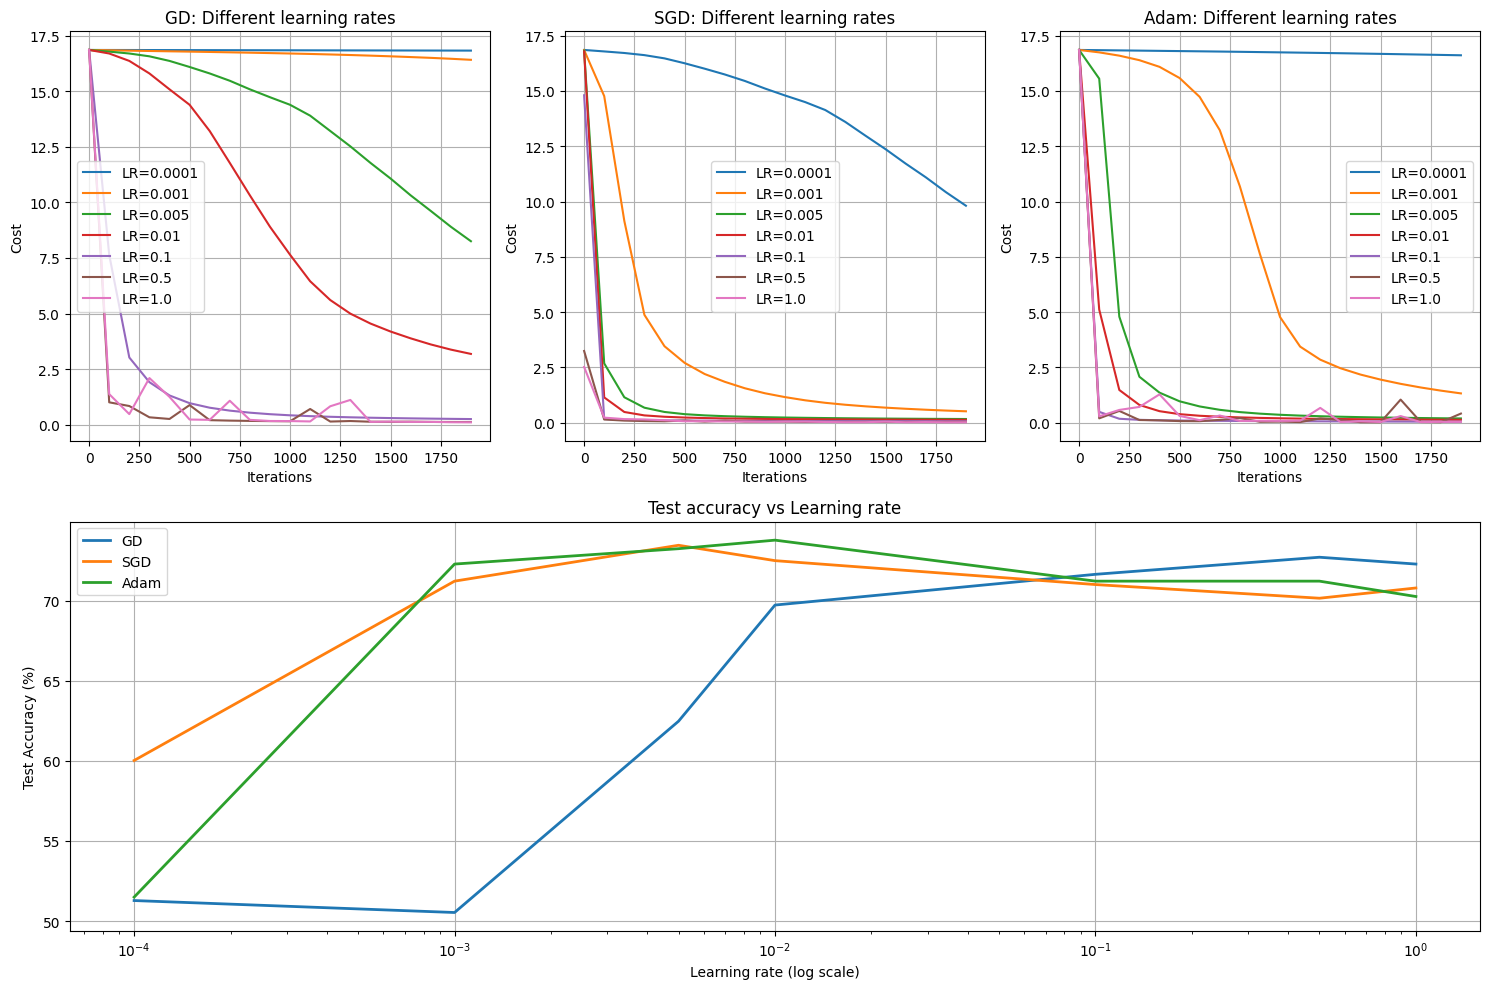

In [ ]:
plt.figure(figsize=(15, 10))
# Gradient descent
plt.subplot(2, 3, 1)
for i, lr in enumerate(learning_rates):
    costs = models_gd[i]['costs']
    iterations = range(0, len(costs) * 100, 100)
    plt.plot(iterations, costs, label=f'LR={lr}')
plt.title('GD: Different learning rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# Stochastic gradient descent
plt.subplot(2, 3, 2)
for i, lr in enumerate(learning_rates):
    costs = models_sgd[i]['costs']
    iterations = range(0, len(costs) * 100, 100)
    plt.plot(iterations, costs, label=f'LR={lr}')
plt.title('SGD: Different learning rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# Adam optimization
plt.subplot(2, 3, 3)
for i, lr in enumerate(learning_rates):
    costs = models_adam[i]['costs']
    iterations = range(0, len(costs) * 100, 100)
    plt.plot(iterations, costs, label=f'LR={lr}')
plt.title('Adam: Different learning rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# Comparint the accuracy between different learning rates
lr_accuracies_gd = [100 - np.mean(np.abs(model['Y_prediction_test'] - y_test)) * 100 for model in models_gd]
lr_accuracies_sgd = [100 - np.mean(np.abs(model['Y_prediction_test'] - y_test)) * 100 for model in models_sgd]
lr_accuracies_adam = [100 - np.mean(np.abs(model['Y_prediction_test'] - y_test)) * 100 for model in models_adam]

plt.subplot(2, 1, 2)
plt.plot(learning_rates, lr_accuracies_gd, label='GD', linewidth=2)
plt.plot(learning_rates, lr_accuracies_sgd, label='SGD', linewidth=2)
plt.plot(learning_rates, lr_accuracies_adam, label='Adam', linewidth=2)
plt.xscale('log')
plt.xlabel('Learning rate (log scale)')
plt.ylabel('Test Accuracy (%)')
plt.title('Test accuracy vs Learning rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Conclusions:
1. GD:
    
    **LR (0.0001-0.001)** is too small and leads to under-education. Almost horizontal lines, which indicates that there is no convergence.

    **LR (0.01-0.05)** is the optimal range. Smooth downward curves and stable convergence.

    **LR (0.1-0.5)** steep declines at the beginning, but possible fluctuations

    **LR (1.0)** value is too high, does not improve the result

    The higher the LR, the steeper the initial decline in cost.

2. SGD:
    
    **LR=0.001** achieves high accuracy

    **LR=0.005** the optimal

    **LR (0.1-1.0)** leads to severe overfitting

    Steeper curves compared to GD for the same LR. A characteristic feature of SGD is the presence of pronounced noise on the curves. Early convergence and rapid saturation - optimal results are achieved faster.

3. Adam:

    Consistently high results over the entire range

    **LR=0.01** best result

    The least sensitive to the choice of LR due to adaptability

    This method has the least noise among all. Steady decline without sudden fluctuations, continues to improve until the end of training.

4. Test accuracy vs Learning rate

    The optimal LR is between 0.001 and 0.1 for all methods. GD is the most sensitive to the choice of LR, unlike Adam, which is the most stable.
    
    Too low a learning rate is ineffective for all methods, however, with a high learning rate, accuracy decreases due to instability.
    
    The graphs clearly confirm that choosing the right learning rate is no less important than choosing an optimization algorithm.
